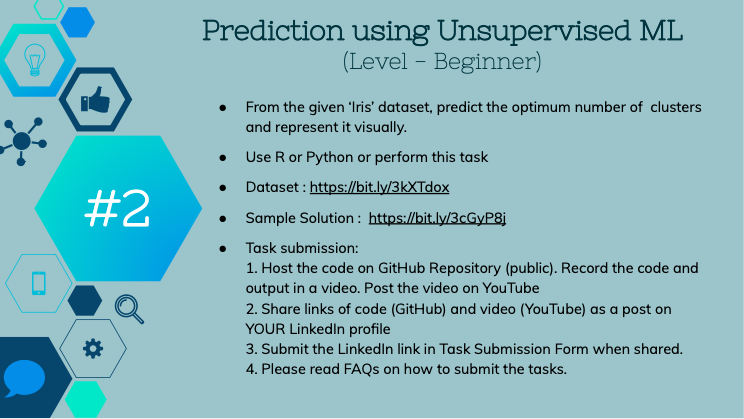

In [2]:
import numpy as np
import matplotlib.pyplot as mt
import pandas as pd
from sklearn import datasets

/Users/kshitiz/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
# Load the iris dataset
iris = datasets.load_iris()
#Extract features
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


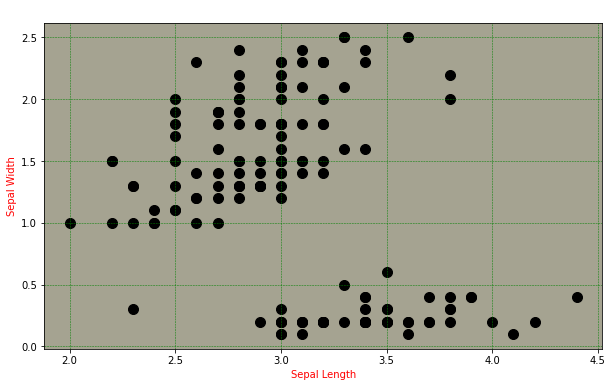

In [102]:
# Visualising the DATA - On the first two columns
fig, ax = mt.subplots(figsize=(10, 6))
ax.scatter(iris_df.iloc[:,1],iris_df.iloc[:,3],color='black',s=100)
ax.set_ylabel('Sepal Width',color='r')
ax.set_xlabel('Sepal Length',color='r')
ax.set_title('Visualization of First two columns',color='w')
ax.set_facecolor('xkcd:cement')
ax.grid(color = 'green', linestyle = '--', linewidth = 0.5)
mt.show()

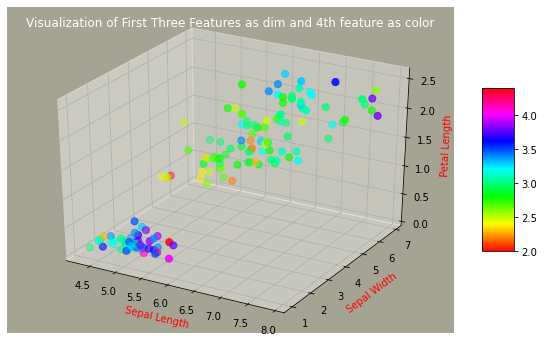

In [73]:
fig = mt.figure(figsize = (10, 6))
ax = mt.axes(projection ="3d")
my_cmap = mt.get_cmap('hsv')
sctt = ax.scatter3D(iris_df.iloc[:,0],iris_df.iloc[:,2],iris_df.iloc[:,3],c=iris_df.iloc[:,1],cmap=my_cmap,s=50)

ax.set_ylabel('Sepal Width',color='r')
ax.set_xlabel('Sepal Length',color='r')
ax.set_zlabel('Petal Length',color='r')
ax.set_title('Visualization of First Three Features as dim and 4th feature as color',color='w')
ax.set_facecolor('xkcd:cement')
ax.grid(color = 'green', linestyle = '--', linewidth = 0.5)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
mt.show()

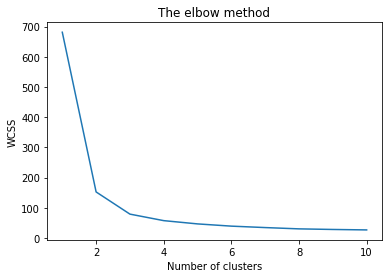

In [40]:
# Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph,
# `allowing us to observe 'The elbow'
mt.plot(range(1, 11), wcss)
mt.title('The elbow method')
mt.xlabel('Number of clusters')
mt.ylabel('WCSS') # Within cluster sum of squares
mt.show()

In [41]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

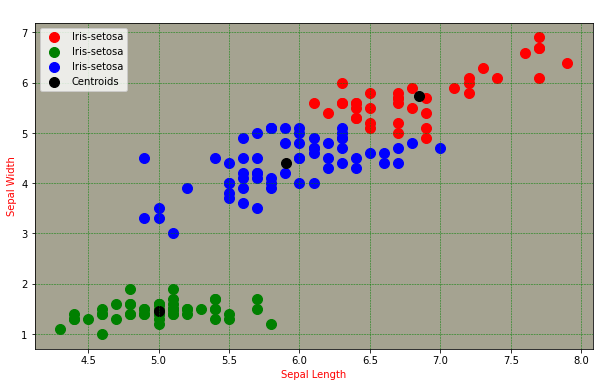

In [97]:
# Visualising the DATA - On the first two columns
fig, ax = mt.subplots(figsize=(10, 6))
ax.scatter(x[y_kmeans==0,0],x[y_kmeans==0,2],color='r',s=100,label = 'Iris-setosa')
ax.scatter(x[y_kmeans==1,0],x[y_kmeans==1,2],color='g',s=100,label = 'Iris-setosa')
ax.scatter(x[y_kmeans==2,0],x[y_kmeans==2,2],color='b',s=100,label = 'Iris-setosa')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2],s=100,c = 'black', label = 'Centroids')
ax.set_ylabel('Sepal Width',color='r')
ax.set_xlabel('Sepal Length',color='r')
ax.set_title('Visualization of First two columns',color='w')
ax.set_facecolor('xkcd:cement')
ax.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.legend()
mt.show()

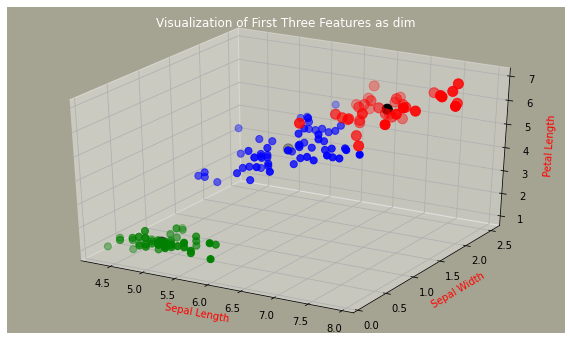

In [94]:
fig = mt.figure(figsize = (10, 6))
ax = mt.axes(projection ="3d")
ax.scatter3D(x[y_kmeans==0,0],x[y_kmeans==0,3],x[y_kmeans==0,2],color='r',s=100,label = 'Iris-setosa')
ax.scatter(x[y_kmeans==1,0],x[y_kmeans==1,3],x[y_kmeans==1,2],color='g',s=50,label = 'Iris-setosa')
ax.scatter(x[y_kmeans==2,0],x[y_kmeans==2,3],x[y_kmeans==2,2],color='b',s=50,label = 'Iris-setosa')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,3],kmeans.cluster_centers_[:,2],s=100,c = 'black', label = 'Centroids')
ax.set_ylabel('Sepal Width',color='r')
ax.set_xlabel('Sepal Length',color='r')
ax.set_zlabel('Petal Length',color='r')
ax.set_title('Visualization of First Three Features as dim',color='w')
ax.set_facecolor('xkcd:cement')
ax.grid(color = 'green', linestyle = '--', linewidth = 0.5)
mt.show()